In [3]:
from sklearn.cluster import KMeans as KM
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import balanced_accuracy_score,f1_score, accuracy_score, precision_score, recall_score
import numpy as np
#plot the depth
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_validate
from sklearn.metrics import balanced_accuracy_score,f1_score,precision_score, recall_score

In [4]:
from sklearn.metrics import silhouette_score, completeness_score, homogeneity_score, fowlkes_mallows_score
def km(tx, ty, rx, ry, add="", times=5):
    #this does the exact same thing as the above
    errs = []
    completeness = []
    homo = []
    fm = []
    silo = []
    
    

#     checker = KM(n_clusters=2)
#     checker.fit(ry)
#     truth = checker.predict(ry)

    # so we do this a bunch of times
    for i in range(2,times):
        clusters = {x:[] for x in range(i)}
        clf = KM(n_clusters=i)
        clf.fit(tx)  #fit it to our data
        test = clf.predict(tx)
        result = clf.predict(rx)  # and test it on the testing set
        completeness.append(completeness_score(ry, result))
        homo.append(homogeneity_score(ry, result))
        fm.append(fowlkes_mallows_score(ry, result))
        silo.append(silhouette_score(rx, result))
        errs.append(clf.inertia_)
    print(errs)
    print(completeness)
    print(homo)
    print(fm)
    print(silo)
    scores= [completeness, homo, fm, silo]        
    #plot([0, times, min(errs)-5, max(errs)+5],[range(2, times), errs, "ro"], "Number of Clusters", "Intertia", "KMeans clustering Intertia " + add, "KM"+add)
    return scores

In [5]:
from sklearn.mixture import GaussianMixture as EM
def em(tx, ty, rx, ry, add="", times=5):
    completeness = []
    homo = []
    fm = []
    silo = []
    
    # so we do this a bunch of times
    for i in range(2,times):

        # create a clusterer
        clf = EM(n_components=i)
        clf.fit(tx)  #fit it to our data
        test = clf.predict(tx)
        result = clf.predict(rx)  # and test it on the testing set

        completeness.append(completeness_score(ry, result))
        homo.append(homogeneity_score(ry, result))
        fm.append(fowlkes_mallows_score(ry, result))
        silo.append(silhouette_score(rx, result))
    scores= [completeness, homo, fm, silo] 
    
    return scores
        
    

In [1]:
def oneem(tx, ty, rx, ry, add="", times=5):
    scores = []
    clf = EM(n_components=times)
    clf.fit(tx)  #fit it to our data
    scores.append(clf.predict_proba(tx))
    scores.append(clf.predict_proba(rx))
    return scores

In [2]:
def onekm(tx, ty, rx, ry,times=8):
    clf = KM(n_clusters=times)
    clf.fit(tx)  #fit it to our data
    scores = []
    scores.append(clf.labels_.reshape(-1, 1))
    scores.append(clf.predict(rx).reshape(-1, 1))
    return scores

In [10]:
from sklearn.random_projection import GaussianRandomProjection as RandomProjection
def randproj(tx, ty, rx, ry):
    scores = list()
    compressor = RandomProjection(20)
    compressor.fit(tx, y=ty)
    newtx = compressor.transform(tx)
    # compressor = RandomProjection(tx[1].size)
    newrx = compressor.transform(rx)
    #print(compressor.n_component_ )
    scores.append(onekm(newtx, ty, newrx, ry, times=9))
    scores.append(oneem(newtx, ty, newrx, ry, times=9))

    return scores

In [11]:
scores = randproj(X_train_FM, y_train_FM, X_test_FM, y_test_FM)

In [13]:
from sklearn.neural_network import MLPClassifier

newtx = scores[0][0].reshape(-1,1)
newrx = scores[0][1].reshape(-1,1)
num_epochs = range(1,301, 50)
test_acc = []
train_acc = []
for i in num_epochs:
    print(i)
    hidden_layer = tuple([15]*3)
    mlp = MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
           beta_2=0.999, epsilon=1e-08,
           hidden_layer_sizes=hidden_layer, learning_rate='constant',
           learning_rate_init=0.001, max_iter=i, momentum=0.9,
           nesterovs_momentum=True, random_state=None,
           shuffle=True, solver='adam', tol=1e-4, validation_fraction=0.1)
    mlp.fit(newtx,y_train_FM)
    prediction_test = mlp.predict(newrx)
    prediction_train = mlp.predict(newtx)
    train_acc.append((accuracy_score(y_train_FM, prediction_train)))
    test_acc.append((accuracy_score(y_test_FM, prediction_test)))

1
51


/usr/local/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (51) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


101


/usr/local/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (101) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


151
201


/usr/local/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (201) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


251


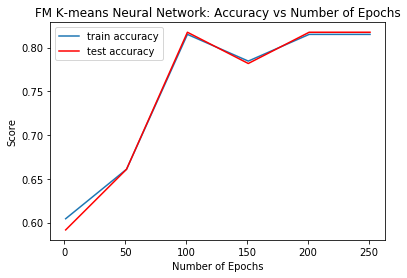

In [15]:
import matplotlib.pyplot as plt
plt.figure()
plt.title('FM K-means Neural Network: Accuracy vs Number of Epochs')
#plt.ylim((0,1))
plt.plot(num_epochs, list(train_acc), '-', label='train accuracy')
plt.plot(num_epochs, list(test_acc),linestyle='-', label='test accuracy ', color='red')
plt.xlabel("Number of Epochs")
plt.ylabel("Score")
plt.legend()
plt.savefig('precision_accuracy_neural_net_num_epochs_fashion')


In [16]:
from sklearn.neural_network import MLPClassifier

newtx = scores[1][0]
newrx = scores[1][1]
num_epochs = range(1,301, 50)
test_acc = []
train_acc = []
for i in num_epochs:
    print(i)
    hidden_layer = tuple([15]*3)
    mlp = MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
           beta_2=0.999, epsilon=1e-08,
           hidden_layer_sizes=hidden_layer, learning_rate='constant',
           learning_rate_init=0.001, max_iter=i, momentum=0.9,
           nesterovs_momentum=True, random_state=None,
           shuffle=True, solver='adam', tol=1e-4, validation_fraction=0.1)
    mlp.fit(newtx,y_train_FM)
    prediction_test = mlp.predict(newrx)
    prediction_train = mlp.predict(newtx)
    train_acc.append((accuracy_score(y_train_FM, prediction_train)))
    test_acc.append((accuracy_score(y_test_FM, prediction_test)))

1
51


/usr/local/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (51) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


101


/usr/local/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (101) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


151


/usr/local/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (151) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


201


/usr/local/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (201) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


251


/usr/local/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (251) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


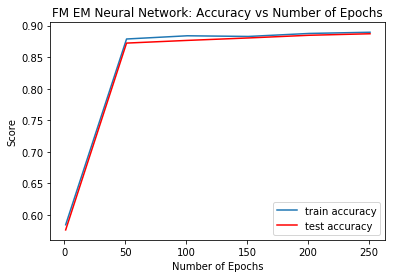

In [17]:
import matplotlib.pyplot as plt
plt.figure()
plt.title('FM EM Neural Network: Accuracy vs Number of Epochs')
#plt.ylim((0,1))
plt.plot(num_epochs, list(train_acc), '-', label='train accuracy')
plt.plot(num_epochs, list(test_acc),linestyle='-', label='test accuracy ', color='red')
plt.xlabel("Number of Epochs")
plt.ylabel("Score")
plt.legend()
plt.savefig('precision_accuracy_neural_net_num_epochs_fashion')


In [46]:
df = pd.read_csv('data/breast_cancer.csv', delimiter=',', quotechar='"')
features = df.loc[:,"radius_mean":"fractal_dimension_worst"]
labels = df["diagnosis"]
#1 for malignant 0 for benign
binary_labels = [1 if x == 'M' else 0 for x in labels]

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(features)
features = scaler.transform(features)

all_data = np.column_stack( (features, binary_labels))
X_train_BC, X_test_BC, y_train_BC, y_test_BC = train_test_split(features, binary_labels, test_size=0.25)

In [56]:
scores = randproj(X_train_BC, y_train_BC, X_test_BC, y_test_BC)

[8121.71365748617, 7140.008056441928, 6453.4873070541125, 5882.066176121876, 5370.419383101605, 5072.432202313243, 4865.884296121976, 4660.933269086647, 4493.475714046475, 4309.371661768404, 4258.402889434249, 4072.244544294461, 3980.760901701735, 3835.908255999448, 3677.865367494577, 3605.663141792741, 3534.333125050052, 3425.7993173633918]
[0.6479865058032069, 0.44547436271391205, 0.43708371837727333, 0.36405338117495806, 0.3492409567592644, 0.29977777851585097, 0.26091087460196055, 0.24288521426251536, 0.2261440334228733, 0.25425356392511206, 0.2255269121513807, 0.2330643315190732, 0.23314782900367678, 0.22828806910119548, 0.21892752538966836, 0.2041434536754023, 0.20972190327678364, 0.2244680618836415]
[0.6251354857488288, 0.6143888007908372, 0.7000345355911253, 0.7557856883268107, 0.8061171115783328, 0.7788014743712148, 0.7338356677958342, 0.7434844332941075, 0.7196728552487145, 0.815929913424549, 0.738561409464916, 0.8272286274269651, 0.8071881146688806, 0.8386308121592775, 0.795

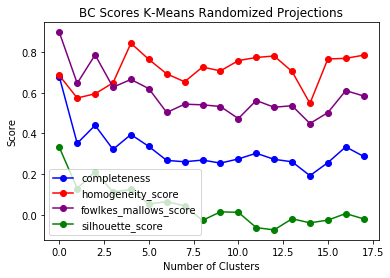

In [62]:
plt.figure()
plt.title('BC Scores K-Means Randomized Projections')
#plt.ylim((0,1))


depths= range(0, len(scores[0][0]))
#scores= [completeness, homo, fm, silo] 
plt.plot(depths, scores[0][0], 'o-', color='blue', label='completeness')
plt.plot(depths, scores[0][1],'o-',  color='red', label='homogeneity_score')
plt.plot(depths, scores[0][2],'o-',  color='purple', label='fowlkes_mallows_score')
plt.plot(depths, scores[0][3],'o-',  color='green', label='silhouette_score')



plt.xlabel("Number of Clusters")
plt.ylabel("Score")
plt.legend()
plt.savefig('depth_scores_FM_km')
plt.show()

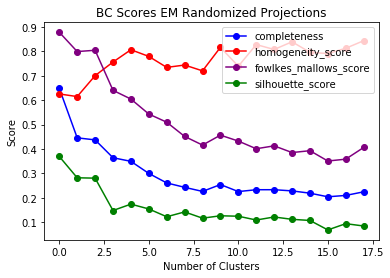

In [63]:
plt.figure()
plt.title('BC Scores EM Randomized Projections')
#plt.ylim((0,1))


depths= range(0, len(scores[1][0]))
#scores= [completeness, homo, fm, silo] 
plt.plot(depths, scores[1][0], 'o-', color='blue', label='completeness')
plt.plot(depths, scores[1][1],'o-',  color='red', label='homogeneity_score')
plt.plot(depths, scores[1][2],'o-',  color='purple', label='fowlkes_mallows_score')
plt.plot(depths, scores[1][3],'o-',  color='green', label='silhouette_score')



plt.xlabel("Number of Clusters")
plt.ylabel("Score")
plt.legend()
plt.savefig('depth_scores_FM_em')
plt.show()

In [6]:
df = pd.read_csv('data/fashion_half.csv', delimiter=',', quotechar='"')
from sklearn.model_selection import train_test_split
features = df.loc[:,"pixel1":"pixel784"]
scaler = StandardScaler()
scaler.fit(features)
features = scaler.transform(features)

X_train_FM, X_test_FM, y_train_FM, y_test_FM = train_test_split(features, df["label"], test_size=0.25)

/usr/local/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  


In [65]:
scores = randproj(X_train_FM, y_train_FM, X_test_FM, y_test_FM)

[13343571.42319936, 11647843.306209859, 10643991.486347212, 9962062.817358568, 9430839.968641052, 9002053.781937124, 8715263.595377306, 8522748.148375055, 8352596.815491673, 8197361.356204542, 8052462.8515892085, 7935797.489739974, 7802834.445303194, 7706888.253935139, 7584793.919014102, 7474787.033312535, 7386627.250983916, 7298816.3572238]
[0.6469803650681372, 0.4696641037844506, 0.45947500841971695, 0.46828210974506784, 0.4856809618513884, 0.48449684706480245, 0.4936291602255853, 0.4747560020997669, 0.4561722728166548, 0.4404121760550817, 0.4325533945507244, 0.4290852835459802, 0.426327569364723, 0.4068385024997812, 0.4099446169158108, 0.40418580959287015, 0.4059062347016018, 0.39569437164644355]
[0.2620326911053839, 0.31863590786963714, 0.38639836152680734, 0.4616627880686461, 0.536421036016069, 0.5743479719512139, 0.6233329019733361, 0.640159756009639, 0.646999906627627, 0.6483435532097328, 0.6535690941534655, 0.6637937002645351, 0.6723753407183405, 0.6738388285211273, 0.684016847

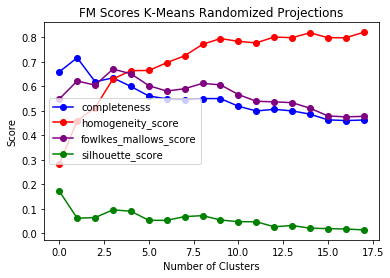

In [68]:
plt.figure()
plt.title('FM Scores K-Means Randomized Projections')
#plt.ylim((0,1))


depths= range(0, len(scores[0][0]))
#scores= [completeness, homo, fm, silo] 
plt.plot(depths, scores[0][0], 'o-', color='blue', label='completeness')
plt.plot(depths, scores[0][1],'o-',  color='red', label='homogeneity_score')
plt.plot(depths, scores[0][2],'o-',  color='purple', label='fowlkes_mallows_score')
plt.plot(depths, scores[0][3],'o-',  color='green', label='silhouette_score')



plt.xlabel("Number of Clusters")
plt.ylabel("Score")
plt.legend()
plt.savefig('depth_scores_FM_km')
plt.show()

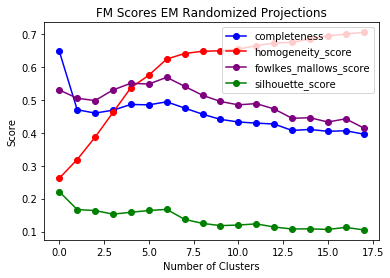

In [67]:
plt.figure()
plt.title('FM Scores EM Randomized Projections')
#plt.ylim((0,1))


depths= range(0, len(scores[1][0]))
#scores= [completeness, homo, fm, silo] 
plt.plot(depths, scores[1][0], 'o-', color='blue', label='completeness')
plt.plot(depths, scores[1][1],'o-',  color='red', label='homogeneity_score')
plt.plot(depths, scores[1][2],'o-',  color='purple', label='fowlkes_mallows_score')
plt.plot(depths, scores[1][3],'o-',  color='green', label='silhouette_score')



plt.xlabel("Number of Clusters")
plt.ylabel("Score")
plt.legend()
plt.savefig('depth_scores_FM_em')
plt.show()

In [87]:
from sklearn.metrics import balanced_accuracy_score,f1_score, accuracy_score
from sklearn.neural_network import MLPClassifier
import statistics
#change the number of hidden epochs
num_epochs = range(301, 601, 50)

train_acc = [95] *6 
test_acc = [0.5132888888888889,0.8757777777777778,0.8724888888888889,0.8667111111111111,0.858,0.8810222222222223]
test_std = [0.10515312291729267,0.011396165696961082,0.01779354856037346,0.0065269810388480076,0.009998222064169457,0.01941469470196143]





for i in num_epochs:
    train_acc_avg = []
    test_acc_avg =[]
    for j in range(0,3):
        compressor = RandomProjection(10)
        compressor.fit(X_train_FM, y=y_train_FM)
        newtx = compressor.transform(X_train_FM)
        newrx = compressor.transform(X_test_FM)
        hidden_layer = tuple([15]*14)
        mlp = MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
               beta_2=0.999, epsilon=1e-08,
               hidden_layer_sizes=hidden_layer, learning_rate='constant',
               learning_rate_init=0.001, max_iter=i, momentum=0.9,
               nesterovs_momentum=True, random_state=None,
               shuffle=True, solver='adam', tol=1e-4, validation_fraction=0.1)
        mlp.fit(newtx,y_train_FM)
        prediction_test = mlp.predict(newrx)
        prediction_train = mlp.predict(newtx)
        train_acc_avg.append((accuracy_score(y_train_FM, prediction_train)))
        test_acc_avg.append((accuracy_score(y_test_FM, prediction_test)))
    train_acc.append(statistics.mean(train_acc_avg))
    test_acc.append(statistics.mean(test_acc_avg))
    test_std.append(statistics.stdev(test_acc_avg))
    

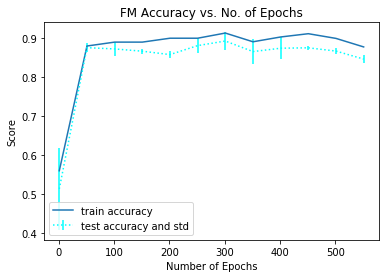

In [93]:
#graph training set size
import matplotlib.pyplot as plt
plt.figure()
plt.title('FM Accuracy vs. No. of Epochs')
#plt.ylim((0,1))

depths = range(1,601, 50)

plt.plot(depths, train_acc, '-', label='train accuracy')
#plt.plot(depths, test_acc,'-',  label='test accuracy')

plt.errorbar(depths, test_acc,yerr=test_std, linestyle=':',color='cyan', label='test accuracy and std')

plt.xlabel("Number of Epochs")
plt.ylabel("Score")

plt.savefig('depth_precision_recall_breastCancer')
plt.legend()
plt.show()

In [90]:
test_std

[0.10515312291729267,
 0.011396165696961082,
 0.01779354856037346,
 0.0065269810388480076,
 0.009998222064169457,
 0.01941469470196143,
 0.022533333333333322,
 0.031163511426738254,
 0.028262368645983655,
 0.004772762225300893,
 0.00794909731656044,
 0.010492184039842468]

In [92]:
train_acc = [0.56, 0.88, 0.89, 0.89, 0.90, 0.90, 0.9132592592592592,0.8908592592592592,0.9031851851851852,0.9115851851851852,0.899525925925926,0.8776592592592593]

In [84]:
num_layers = range(0,10)
from sklearn.metrics import balanced_accuracy_score,f1_score, accuracy_score
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import PCA as PCA

train_acc = []
test_acc = []
test_std = []



for i in num_layers:
    train_acc_avg = []
    test_acc_avg =[]
    for j in range(0,3):
        compressor = RandomProjection(10)
        compressor.fit(X_train_FM, y=y_train_FM)
        newtx = compressor.transform(X_train_FM)
        newrx = compressor.transform(X_test_FM)
        print(i)
        hidden_layer = tuple([15]*i)
        est = MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
               beta_2=0.999, epsilon=1e-08,
               hidden_layer_sizes=hidden_layer, learning_rate='constant',
               learning_rate_init=0.001, max_iter=100, momentum=0.9,
               nesterovs_momentum=True, random_state=None,
               shuffle=True, solver='adam', tol=1e-4, validation_fraction=0.1, warm_start=True)
        est.fit(X_train_FM, y_train_FM)
        train_acc_avg.append((accuracy_score(y_train_FM, est.predict(X_train_FM))))
        test_acc_avg.append((accuracy_score(y_test_FM, est.predict(X_test_FM))))
    train_acc.append(statistics.mean(train_acc_avg))
    test_acc.append(statistics.mean(test_acc_avg))
    test_std.append(statistics.stdev(test_acc_avg))

0


/usr/local/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


0


/usr/local/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


0


/usr/local/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


1
1
1
2
2
2
3
3
3
4
4
4
5
5
5
6
6
6
7
7
7
8
8
8
9


/usr/local/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


9
9


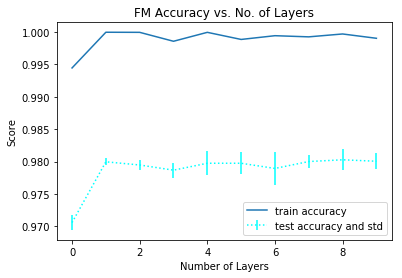

In [85]:
#graph training set size
import matplotlib.pyplot as plt
plt.figure()
plt.title('FM Accuracy vs. No. of Layers')
#plt.ylim((0,1))

depths = range(0,10)

plt.plot(depths, train_acc, '-', label='train accuracy')
#plt.plot(depths, test_acc,'-',  label='test accuracy')

plt.errorbar(depths, test_acc,yerr=test_std, linestyle=':',color='cyan', label='test accuracy and std')

plt.xlabel("Number of Layers")
plt.ylabel("Score")

plt.savefig('depth_precision_recall_breastCancer')
plt.legend()
plt.show()

In [86]:
train_acc

[0.9944444444444445,
 0.9999555555555556,
 0.9999407407407408,
 0.998562962962963,
 0.9999407407407407,
 0.9988444444444444,
 0.9994222222222222,
 0.9992444444444445,
 0.9996888888888888,
 0.9990222222222223]